<a href="https://colab.research.google.com/github/HamzaGbada/ML-Examples/blob/main/Bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

df1 = pd.read_csv("train_data1.csv") 
df2 = pd.read_csv("train_data2.csv") 
df3 = pd.read_csv("train_data3.csv") 
df1_test = pd.read_csv("train_data1.csv")
df2_test = pd.read_csv("train_data2.csv") 
df3_test = pd.read_csv("train_data3.csv")  

In [ ]:
df1_test_numpy = df1_test.values
df2_test_numpy = df2_test.values
df3_test_numpy = df3_test.values

# Displaying training sets

In [ ]:
# Extract data as numpy array:
df1_numpy = df1.values
df2_numpy = df2.values

Seperate each class from th first dataset




In [ ]:
# dataset1
class1_data1 = df1_numpy[df1_numpy[:,2] == 1][:,0:2]
class2_data1 = df1_numpy[df1_numpy[:,2] == 0][:,0:2]

# dataset2
class1_data2 = df2_numpy[df2_numpy[:,2] == 1][:,0:2]
class2_data2 = df2_numpy[df2_numpy[:,2] == 0][:,0:2]

Compute the covariance matrix of each class

In [ ]:
# dataset 1
class1_data1_cov = np.cov(class1_data1, rowvar = False)
class2_data1_cov = np.cov(class2_data1, rowvar = False)

# dataset 2
class1_data2_cov = np.cov(class1_data2, rowvar = False)
class2_data2_cov = np.cov(class1_data2, rowvar = False)


## Ploting covariance matrix for each class

Dataset1

Text(0.5, 0.98, 'Covariances matrices of each in class in 2 dataset')

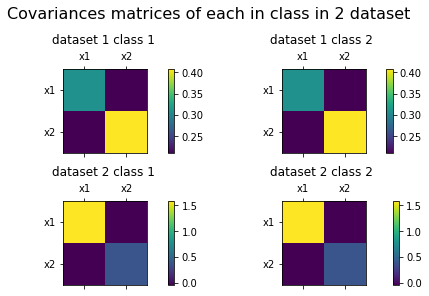

In [ ]:
alpha = ['x1', 'x2']
fig, ax = plt.subplots(2, 2, constrained_layout=True)
# dataset 1 class 1
cax = ax[0, 0].matshow(class1_data1_cov,interpolation='nearest') 
fig.colorbar(cax, ax=ax[0, 0])
ax[0, 0].set_xticklabels(['']+alpha)
ax[0, 0].set_yticklabels(['']+alpha)
ax[0, 0].set_title('dataset 1 class 1 \n')

# dataset 1 class 2
cax = ax[0, 1].matshow(class2_data1_cov,interpolation='nearest') 
fig.colorbar(cax, ax=ax[0, 1])
ax[0, 1].set_xticklabels(['']+alpha)
ax[0, 1].set_yticklabels(['']+alpha)
ax[0, 1].set_title('dataset 1 class 2 \n')

# dataset 2 class 1
cax = ax[1, 0].matshow(class1_data2_cov,interpolation='nearest') 
fig.colorbar(cax, ax=ax[1, 0])
ax[1, 0].set_xticklabels(['']+alpha)
ax[1, 0].set_yticklabels(['']+alpha)
ax[1, 0].set_title('dataset 2 class 1 \n')

# dataset 2 class 2

cax = ax[1, 1].matshow(class2_data2_cov,interpolation='nearest')
fig.colorbar(cax, ax=ax[1, 1])
ax[1, 1].set_xticklabels(['']+alpha)
ax[1, 1].set_yticklabels(['']+alpha)
ax[1, 1].set_title('dataset 2 class 2 \n')

fig.suptitle('Covariances matrices of each in class in 2 dataset', fontsize=16)

**Interpretation**

The non-diagonal elements of covariance matrix of the first dataset  are positive, we can see that x1 and x2 are postively correlated (if x1 increases x2 also increases.) ; but in the second dataset set they are négative so it means that they are negatively correlated (x1 increases x2 decreases.)

## Ploting features histograms

In [ ]:
feature1_class1 = class1_data1[:,0]
feature1_class2 = class2_data1[:,0]

feature2_class1 = class1_data1[:,1]
feature2_class2 = class2_data1[:,1]

feature1_class1 = class1_data2[:,0]
feature1_class2 = class2_data2[:,0]

feature2_class1 = class1_data2[:,1]
feature2_class2 = class2_data2[:,1]

Ploting feature 1 for the dataset 1

Text(0.5, 0.98, 'Histograms for each feature (red for class 0 and blue for class 1)')

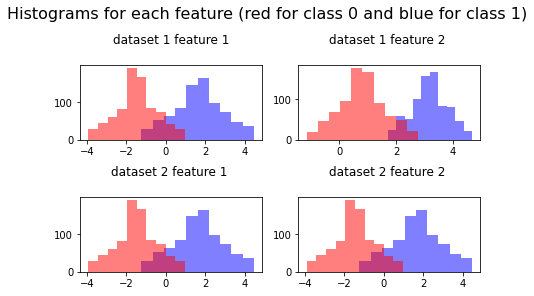

In [ ]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)
# dataset 1 feature 1
cax = ax[0, 0].hist(feature1_class1, alpha=0.5, color= 'b')
cax = ax[0, 0].hist(feature1_class2, alpha=0.5, color= 'r')

ax[0, 0].set_title('dataset 1 feature 1\n')

# dataset 1 feature 2
cax = ax[0, 1].hist(feature2_class1, alpha=0.5, color= 'b')
cax = ax[0, 1].hist(feature2_class2, alpha=0.5, color= 'r')
ax[0, 1].set_title('dataset 1 feature 2 \n')

# dataset 2 feature 1
cax = ax[1, 0].hist(feature1_class1, alpha=0.5, color= 'b')
cax = ax[1, 0].hist(feature1_class2, alpha=0.5, color= 'r')

ax[1, 0].set_title('dataset 2 feature 1 \n')

# dataset 2 feature 2

cax = ax[1, 1].hist(feature1_class1, alpha=0.5, color= 'b')
cax = ax[1, 1].hist(feature1_class2, alpha=0.5, color= 'r')

ax[1, 1].set_title('dataset 2 feature 2 \n')

fig.suptitle('Histograms for each feature (red for class 0 and blue for class 1)', fontsize=16)

**Interpretation**

The first feature of the dataset one have a similarity in term of mean and standard deviation, but in the second feature there's some difference between the two classes of the dataset in term of means. So, we can conclude, that there's fracture in the second feature between the two classes



## Plot each training dataset (feature 1 on x-axis and feature 2 on y-axis)

[Text(0, 0.5, 'feature 2'),
 Text(0.5, 0, 'feature 1'),
 Text(0.5, 1.0, 'Distribution of the datasets')]

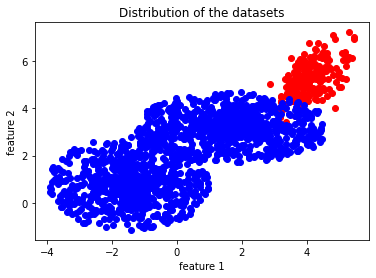

In [ ]:
feature1_data1 = df1_numpy[:,0]
feature2_data1 = df1_numpy[:,1]
feature1_data2 = df2_numpy[:,0]
feature2_data2 = df2_numpy[:,1]

plt.scatter(feature1_data1, feature2_data1, color=['r'])
plt.scatter(feature1_data2, feature2_data2, color=['b'])
plt.gca().set(title='Distribution of the datasets', xlabel='feature 1', ylabel='feature 2')

**Interpretation**

In this plot, we can see clearly that the data is imbalanced



# An implementation of Bayes classifier and testing it using random single dataset

In [ ]:
mean_vector_c1 = np.mean(class1_data1, axis=0)
print(mean_vector_c1)
mean_vector_c2 = np.mean(class2_data1, axis=0)
print(mean_vector_c2)

[4.  4.8]
[4.2 5.7]


In [ ]:
mean_vector_c1 = np.mean(class1_data2, axis=0)
print(mean_vector_c1)
mean_vector_c2 = np.mean(class2_data2, axis=0)
print(mean_vector_c2)

[1.667309   3.19949626]
[-1.45232497  0.81279325]


In [ ]:
print(class1_data1_cov)
print(class2_data1_cov)

[[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]
[[0.31090407 0.2108642 ]
 [0.2108642  0.40802121]]


In [ ]:
print(class1_data2_cov)
print(class2_data2_cov)

[[ 1.59535755 -0.03361042]
 [-0.03361042  0.3931518 ]]
[[ 1.59535755 -0.03361042]
 [-0.03361042  0.3931518 ]]


Text(0.5, 0.98, 'Covariances matrices of each in class in 2 dataset')

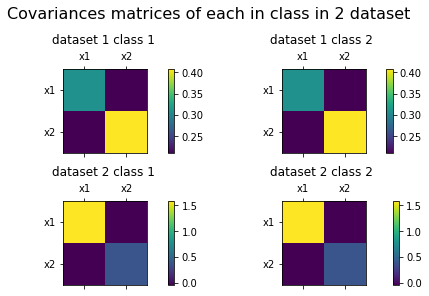

In [ ]:
alpha = ['x1', 'x2']
fig, ax = plt.subplots(2, 2, constrained_layout=True)
# dataset 1 class 1
cax = ax[0, 0].matshow(class1_data1_cov,interpolation='nearest') 
fig.colorbar(cax, ax=ax[0, 0])
ax[0, 0].set_xticklabels(['']+alpha)
ax[0, 0].set_yticklabels(['']+alpha)
ax[0, 0].set_title('dataset 1 class 1 \n')

# dataset 1 class 2
cax = ax[0, 1].matshow(class2_data1_cov,interpolation='nearest') 
fig.colorbar(cax, ax=ax[0, 1])
ax[0, 1].set_xticklabels(['']+alpha)
ax[0, 1].set_yticklabels(['']+alpha)
ax[0, 1].set_title('dataset 1 class 2 \n')

# dataset 2 class 1
cax = ax[1, 0].matshow(class1_data2_cov,interpolation='nearest') 
fig.colorbar(cax, ax=ax[1, 0])
ax[1, 0].set_xticklabels(['']+alpha)
ax[1, 0].set_yticklabels(['']+alpha)
ax[1, 0].set_title('dataset 2 class 1 \n')

# dataset 2 class 2

cax = ax[1, 1].matshow(class2_data2_cov,interpolation='nearest')
fig.colorbar(cax, ax=ax[1, 1])
ax[1, 1].set_xticklabels(['']+alpha)
ax[1, 1].set_yticklabels(['']+alpha)
ax[1, 1].set_title('dataset 2 class 2 \n')

fig.suptitle('Covariances matrices of each in class in 2 dataset', fontsize=16)

## Implementation of the linear Bayes classifier

In [ ]:
from numpy.linalg import inv, det, pinv

def trainBayes(X):

  """
  This function compute the coefficient of the discriminant function g_iX 

  params:
    X: The train data (Samples and labels)
  
  return:
    w_1, w_1_0, w_2, w_2_0 : If the covariances matrices are equals
    W_1, w_1, w_1_0, W_2, w_2, w_2_0: If the covariances matrices are not equals

  """
  class1 = X[X[:,2] == 1][:,0:2]
  class2 = X[X[:,2] == 0][:,0:2]

  class1_cov = np.cov(class1, rowvar = False)
  class2_cov = np.cov(class2, rowvar = False)

  mean_vector_c1 = np.mean(class1, axis=0)
  mean_vector_c2 = np.mean(class2, axis=0)

  # extract probability of each class
  y = X[:,2]
  _, counts = np.unique(y, return_counts=True)
  c1_prob = counts[0]/len(y)
  c2_prob = counts[1]/len(y)

  # check if covarience matrix is invertible
  if det(class1_cov) !=0 :
    cov_c1_inv = inv(class1_cov)
  else:
    cov_c1_inv = pinv(class1_cov)

  if det(class2_cov) !=0 :
    cov_c2_inv = inv(class2_cov)
  else:
    cov_c2_inv = pinv(class2_cov)

  # The first time I use np.array_equal(class1_cov, class2_cov) to check if cov_mat are equal 
  # but, I found that the two cov_mat are equal with a little tolenrance so I change it to 
  # np.allclose(class1_cov, class2_cov)
  if np.allclose(class1_cov, class2_cov):
    print("covariances are equals")
    if c1_prob == 0.5:
      print("data is balanced")
      w_1 = np.dot(mean_vector_c1.transpose(), cov_c1_inv)
      w_1_0 = -0.5*np.dot(np.dot(mean_vector_c1.transpose(), cov_c1_inv), mean_vector_c1)

      w_2 = np.dot(mean_vector_c2.transpose(), cov_c2_inv)
      w_2_0 = -0.5*np.dot(np.dot(mean_vector_c2.transpose(), cov_c2_inv), mean_vector_c2)
    else:
      print("data is unbalanced")
      w_1 = np.dot(mean_vector_c1.transpose(), cov_c1_inv)
      w_1_0 = np.log(c1_prob)-0.5*np.dot(np.dot(mean_vector_c1.transpose(), cov_c1_inv), mean_vector_c1)

      w_2 = np.dot(mean_vector_c2.transpose(), cov_c2_inv)
      w_2_0 = np.log(c2_prob)-0.5*np.dot(np.dot(mean_vector_c2.transpose(), cov_c2_inv), mean_vector_c2)
    return w_1, w_1_0, w_2, w_2_0
  else:
    print("General case")
    W_1 = -0.5 * cov_c1_inv
    w_1 = np.dot(mean_vector_c1.transpose(), cov_c1_inv)
    w_1_0 = np.log(c1_prob)-0.5*np.dot(np.dot(mean_vector_c1.transpose(), cov_c1_inv), mean_vector_c1)-0.5*np.log(det(class1_cov))

    W_2 = -0.5 * cov_c2_inv
    w_2 = np.dot(mean_vector_c2.transpose(), cov_c2_inv)
    w_2_0 = np.log(c2_prob)-0.5*np.dot(np.dot(mean_vector_c2.transpose(), cov_c2_inv), mean_vector_c2)-0.5*np.log(det(class2_cov))
    
    return W_1, w_1, w_1_0, W_2, w_2, w_2_0

In [ ]:
def predict(X_test, W_bayes):
  """
  this fuction return a list of prediction of the test data.

  params:
    X_test: the test data.
    W_bayes: the coefficient of the discriminant function
  """
  y_pred = np.empty(0)
  for i in range(X_test.shape[0]):
    if len(W_bayes) == 4:
      # print("equal covariences")
      g1_X = np.dot(W_bayes[0].transpose(), X_test[i]) + W_bayes[1]
      g2_X = np.dot(W_bayes[2].transpose(), X_test[i]) + W_bayes[3]
    else:
      # print("general case")
      g1_X = np.dot(np.dot(X_test[i].transpose(), W_bayes[0]), X_test[i]) + np.dot(W_bayes[1].transpose(), X_test[i]) + W_bayes[2]
      g2_X = np.dot(np.dot(X_test[i].transpose(), W_bayes[3]), X_test[i]) + np.dot(W_bayes[4].transpose(), X_test[i]) + W_bayes[5]

    if g1_X > g2_X:
      y_pred = np.append(y_pred, 0)
    else:
      y_pred = np.append(y_pred, 1)
  return y_pred

## Bayes classifier testing 

Dataset 1 

In [ ]:
W_bayes = trainBayes(df1_numpy)
X_test = df1_test_numpy[:,0:2]
y_test = df1_test_numpy[:,2]

y_pred = predict(X_test, W_bayes)

mis_classification = len(y_pred)-np.count_nonzero(y_pred == y_test)
e = (mis_classification / y_test.shape[0]) * 100
e

covariances are equals
data is balanced


80.0

Dataset2

In [ ]:
W_bayes = trainBayes(df2_numpy)
X_test = df2_test_numpy[:,0:2]
y_test = df2_test_numpy[:,2]

y_pred = predict(X_test, W_bayes)

mis_classification = len(y_pred)-np.count_nonzero(y_pred == y_test)
e = (mis_classification / y_test.shape[0]) * 100
e

General case


97.75

#Evaluation of Bayes classifier using 5-fold cross-validation

## Dataset 1 

###Combine the training set and the test set row-wise




In [ ]:
df_concat = pd.concat([df1, df1_test])
df_concat_numpy = df_concat.values
X_train_concat = df_concat_numpy[:,0:2]
y_train_concat = df_concat_numpy[:,2]

### Apply 5-fold cross validation on the first combined dataset

In [ ]:
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k)

res = []
for train_index , test_index in kf.split(X_train_concat):
    X_train_kf , X_test_kf = X_train_concat[train_index,:],X_train_concat[test_index,:]
    y_train_kf , y_test_kf = y_train_concat[train_index] , y_train_concat[test_index]
    
    X_train = np.append(X_train_concat, np.reshape(y_train_concat, (len(y_train_concat),1)), axis=1)
    W_bayes = trainBayes(X_train)
    y_pred = predict(X_test_kf, W_bayes)
    
    mis_classification = len(y_pred)-np.count_nonzero(y_pred == y_test_kf)
    e = (mis_classification / y_test_kf.shape[0]) * 100

    res.append(e)

avg_res = sum(res)/k
print('Result of each fold - {}'.format(res))
print('Avg result : {}'.format(avg_res))

covariances are equals
data is balanced
covariances are equals
data is balanced
covariances are equals
data is balanced
covariances are equals
data is balanced
covariances are equals
data is balanced
Result of each fold - [80.0, 83.33333333333334, 86.66666666666667, 70.0, 80.0]
Avg result : 80.0


## Dataset 2

In [ ]:
df_concat = pd.concat([df2, df2_test])
df_concat_numpy = df_concat.values
X_train_concat = df_concat_numpy[:,0:2]
y_train_concat = df_concat_numpy[:,2]

In [ ]:
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, random_state=None)

res = []
for train_index , test_index in kf.split(X_train_concat):
    X_train_kf , X_test_kf = X_train_concat[train_index,:],X_train_concat[test_index,:]
    y_train_kf , y_test_kf = y_train_concat[train_index] , y_train_concat[test_index]
    
    X_train = np.append(X_train_concat, np.reshape(y_train_concat, (len(y_train_concat),1)), axis=1)
    W_bayes = trainBayes(X_train)
    y_pred = predict(X_test_kf, W_bayes)
    
    mis_classification = len(y_pred)-np.count_nonzero(y_pred == y_test_kf)
    e = (mis_classification / y_test_kf.shape[0]) * 100

    res.append(e)

avg_res = sum(res)/k
print('Result of each fold - {}'.format(res))
print('Avg result : {}'.format(avg_res))

General case
General case
General case
General case
General case
Result of each fold - [99.25, 99.0, 99.25, 99.25, 98.0]
Avg result : 98.95


**Interpretation** 

When comparing the results of the bayes classifier using a random split of the dataset and the 5-fold cross validation, it seem like the 5-fold CV give better results.

# Evaluation of Bayes classifier on the third Dataset

In [ ]:
df3_numpy = df3.values
feature1_data3 = df3_numpy[:,0]
feature2_data3 = df3_numpy[:,1]

[Text(0, 0.5, 'feature 2'),
 Text(0.5, 0, 'feature 1'),
 Text(0.5, 1.0, 'Distribution of the third dataset')]

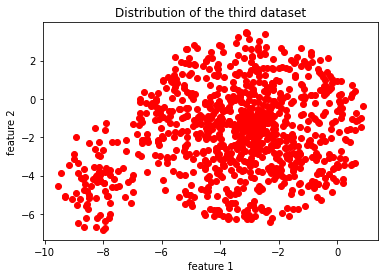

In [ ]:
plt.scatter(feature1_data3, feature2_data3, color=['r'])

plt.gca().set(title='Distribution of the third dataset', xlabel='feature 1', ylabel='feature 2')

In [ ]:
W_bayes = trainBayes(df3_numpy)

df3_sorted = df3_test_numpy[np.argsort(df3_test_numpy[:, 2])]
X_test = df3_sorted[:,0:2]
y_test = df3_sorted[:,2]

y_pred = predict(X_test, W_bayes)

y_test_c1 = y_test[:len(y_test)//2]
y_test_c2 = y_test[len(y_test)//2:]

y_pred_c1 = y_pred[:len(y_pred)//2]
y_pred_c2 = y_pred[len(y_pred)//2:]

mis_classification = len(y_pred)-np.count_nonzero(y_pred == y_test)
e = (mis_classification / y_test.shape[0]) * 100

mis_classification_class1 = len(y_pred_c1)-np.count_nonzero(y_pred_c1 == y_test_c1)
mis_classification_class2 = len(y_pred_c2)-np.count_nonzero(y_pred_c2 == y_test_c2)

e_c1 = (mis_classification_class1 / y_test_c1.shape[0]) * 100
e_c2 = (mis_classification_class2 / y_test_c2.shape[0]) * 100
print(e_c1)
print(e_c2)

General case
98.88888888888889
90.55555555555556
